<b><font size=20, color='#A020F0'>Class Notebook 8</font></b>

## Welcome to your eighth in-class jupyter notebook activity!
In this notebook you'll get more practice with MetPy. We'll be using forecast data from the [GFS](https://www.emc.ncep.noaa.gov/emc/pages/numerical_forecast_systems/gfs.php) (Global Forecast System), a forecast model developed by the [National Centers for Environmental Prediction](https://www.weather.gov/ncep/). You can access output from the GFS at [NCEP](https://www.nco.ncep.noaa.gov/pmb/products/gfs/) and [Amazon Web Services (AWS)](https://registry.opendata.aws/noaa-gfs-bdp-pds/).

<b>This is your final in-class notebook activity!</b>

---

<b><font color='red'>Due Date: 25 November 2024 @ 9 am</font></b><br>

<b>How you will turn in this assignment</b><br> When you are ready to turn in your notebook, do the following:
1. Save your notebook and make sure your results are visible (cells have been executed)
2. Open a terminal and navigate to your local `aos573_completed_assignments` repository
3. Move your completed in-class notebook into your `Class_Notebooks` directory
4. `add` and `commit` your completed notebook
5. Finally, `push` your changes to your remote `aos573_completed_assignments` repository: `git push finished_work main` (you'll need to enter your username and personal access token)
6. <b><font color='red'>REMINDER: DO NOT TRACK OR PUSH THE DATA USED IN THE NOTEBOOK</font></b>
7. <b><font color='blue'>Celebrate!</font></b>

---

## 1. Reading in and exploring your data
The data for this notebook is in the following directory: `/share/Notebook_data/GFS/`

### 1.1 Read in the GFS data
The data that you'll read in is a forecast from the GFS initiated at 06Z on 24 October 2022. The forecast itself is 27 hours out from this time.

The file you should read in is `gfs.t06z.pgrb2.0p25.f027` and it is in grib format. Read in all of the variables associated with the 'isobaricInhPa' vertical coordinate.

Take a look at the variables in your dataset as well as their attributes. What variables exist in this dataset? What are their dimensions and coordinates? What is the valid time for the forecast? You don't need to write these answers out this time--this step is for your own edification and should be something you <b>_always_</b> do when you read in a new data file.

In [2]:
import xarray as xr
import numpy as np
import cfgrib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import metpy.calc as mpcalc
import metpy.plots as mplots
from metpy.units import units
import metpy

In [3]:
path='/share/Notebook_data/GFS/'
ds=xr.open_dataset(path+'gfs.t06z.pgrb2.0p25.f027',engine='cfgrib',filter_by_keys={'typeOfLevel': 'isobaricInhPa'})
ds

skipping variable: paramId==228164 shortName='tcc'
Traceback (most recent call last):
  File "/opt/conda/envs/uw-fall-2024/lib/python3.11/site-packages/cfgrib/dataset.py", line 721, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/opt/conda/envs/uw-fall-2024/lib/python3.11/site-packages/cfgrib/dataset.py", line 639, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  975.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,
        650.,  600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,
        200.,  150.,  100.,   70.,   50.,   40.,   30.,   20.,   15.,
         10.,    7.,    5.,    3.,    2.,    1.])) new_value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  975.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,
        650.,  600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,
        200.

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 33, latitude: 721, longitude: 1440)
Coordinates:
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 975.0 950.0 ... 3.0 2.0 1.0
  * latitude       (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time     datetime64[ns] ...
Data variables:
    gh             (isobaricInhPa, latitude, longitude) float32 ...
    t              (isobaricInhPa, latitude, longitude) float32 ...
    r              (isobaricInhPa, latitude, longitude) float32 ...
    q              (isobaricInhPa, latitude, longitude) float32 ...
    w              (isobaricInhPa, latitude, longitude) float32 ...
    wz             (isobaricInhPa, latitude, longitude) float32 ...
    u              (isobaricInhPa, latitude, longitude) float32 ...
    v              (isobaricInhPa, latitude, longitude) float32 ...
    absv           (isobaricInhPa, latitude, longitude) float32 ...
    o3mr           (isobaricInhPa, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2024-12-02T19:11 GRIB to CDM+CF via cfgrib-0.9.1...

### 1.2 Add units to your data
Use metpy to add units to your variables

In [4]:
ds

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 33, latitude: 721, longitude: 1440)
Coordinates:
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 975.0 950.0 ... 3.0 2.0 1.0
  * latitude       (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time     datetime64[ns] ...
Data variables:
    gh             (isobaricInhPa, latitude, longitude) float32 ...
    t              (isobaricInhPa, latitude, longitude) float32 ...
    r              (isobaricInhPa, latitude, longitude) float32 ...
    q              (isobaricInhPa, latitude, longitude) float32 ...
    w              (isobaricInhPa, latitude, longitude) float32 ...
    wz             (isobaricInhPa, latitude, longitude) float32 ...
    u              (isobaricInhPa, latitude, longitude) float32 ...
    v              (isobaricInhPa, latitude, longitude) float32 ...
    absv           (isobaricInhPa, latitude, longitude) float32 ...
    o3mr           (isobaricInhPa, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2024-12-02T19:11 GRIB to CDM+CF via cfgrib-0.9.1...

In [8]:
ds=ds.metpy.quantify()

---

## 2. Working with your data

### 2.1 Getting variables at a specific pressure level
Extract geopotential height at 900 hPa, temperature at 700 hPa, and zonal and meridional velocity at both 700 hPa and 300 hPa

In [5]:
gh9=ds.gh.sel(isobaricInhPa=900)
t7=ds.t.sel(isobaricInhPa=700)
u7=ds.u.sel(isobaricInhPa=700)
v7=ds.v.sel(isobaricInhPa=700)
u3=ds.u.sel(isobaricInhPa=300)
v3=ds.v.sel(isobaricInhPa=300)

### 2.2 Smooth your data
Use the n-point smoother with the same parameters as we did in class on Monday to smooth each of the variables you extracted above

In [6]:
gh9_s=mpcalc.smooth_n_point(gh9,9,10) 
t7_s=mpcalc.smooth_n_point(t7,9,10)
u7_s=mpcalc.smooth_n_point(u7,9,10)
v7_s=mpcalc.smooth_n_point(v7,9,10) 
u3_s=mpcalc.smooth_n_point(u3,9,10)
v3_s=mpcalc.smooth_n_point(v3,9,10)

### 2.3 Compute the temperature advection
Horizontal temperature advection is $\vec{v}\cdot\vec{\nabla_{h}}T$

Use metpy's [advection](https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.advection.html#metpy.calc.advection) function to calculate the horizontal temperature advection at 700 hPa. Convert the units of your results from K/s to K/h (Kelvin per hour)

In [7]:
ds_advec = metpy.calc.advection(ds.t, u=u7_s, v=v7_s, latitude=ds.latitude, longitude=ds.longitude)
ds_advec.metpy.convert_units('K/hr')


/tmp/ipykernel_121/292431413.py:1: UserWarning: More than one time coordinate present for variable  "t".
  ds_advec = metpy.calc.advection(ds.t, u=u7_s, v=v7_s, latitude=ds.latitude, longitude=ds.longitude)


<xarray.DataArray (isobaricInhPa: 33, latitude: 721, longitude: 1440)>
<Quantity([[[ 9.52206202e-01  9.27168223e-01  9.20717894e-01 ...  9.72434814e-01
    9.63718984e-01  9.57140245e-01]
  [ 4.71148285e+00  1.85021431e+00  5.62862153e-01 ...  5.71140953e-01
    5.75887877e-01  5.78173959e-01]
  [-1.74061044e+00 -2.58044159e-01  3.73652919e-01 ... -2.23482636e-01
   -2.54268473e-01  1.10023389e+00]
  ...
  [-1.46840830e-01 -1.55738971e-01 -3.05737586e-01 ... -3.10543279e-01
   -3.02549775e-01 -5.18514734e-01]
  [-7.35782701e-02 -7.04193146e-02 -4.43013674e-01 ... -4.37431211e-01
   -7.29835237e-02 -7.38738144e-02]
  [ 7.97741137e-03  7.93886354e-03  7.86177164e-03 ...  9.48409795e-03
    9.43914076e-03  8.01595356e-03]]

 [[ 3.23599757e-01  3.25061473e-01  3.22800013e-01 ...  3.29189105e-01
    3.27512290e-01  3.25276564e-01]
  [ 3.55061774e-01  3.45925728e-01  3.41601762e-01 ...  3.55469283e-01
    3.55936012e-01  3.57348958e-01]
  [ 2.48516038e+00  9.74357423e-01  3.28976668e-01 ...  3.41773757e-01
    3.44441053e-01  3.53474476e-01]
...
  [ 4.89454895e-03  6.92328056e-03 -1.43067446e-01 ...  3.55691765e-03
    3.50450793e-03  4.91382450e-03]
  [-3.35870971e-02 -3.21450933e-02 -3.20372209e-02 ... -3.43791497e-02
   -3.41625901e-02 -3.53294518e-02]
  [-4.65455582e-02 -4.63206581e-02 -4.58708522e-02 ... -4.60885320e-02
   -4.58700599e-02 -4.54331176e-02]]

 [[ 5.95029294e-02  5.90918266e-02  4.40161313e-02 ...  6.05306921e-02
    6.02223624e-02  5.98112645e-02]
  [-1.28326162e+00  1.37456652e+00  1.33565375e+00 ...  9.58514129e-02
    9.59772652e-02  9.63582628e-02]
  [ 7.71320684e-02  7.44317208e-02  6.81987341e-01 ...  7.50261181e-02
    7.56116426e-02  7.75946581e-02]
  ...
  [ 4.91905989e-01  2.71274689e-01  1.25579977e-01 ...  2.76785305e-01
    1.29537686e-01  1.19570814e-01]
  [ 8.63717243e-02  8.11312274e-02  8.08589676e-02 ...  8.43860723e-02
    8.38545115e-02  8.67186566e-02]
  [ 2.39443060e-02  2.51530936e-02  2.49088395e-02 ...  2.44070880e-02
    2.42913918e-02  2.40599956e-02]]], 'kelvin / hour')>
Coordinates:
    time           datetime64[ns] 2022-10-24T06:00:00
    step           timedelta64[ns] 1 days 03:00:00
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 975.0 950.0 ... 3.0 2.0 1.0
  * latitude       (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time     datetime64[ns] 2022-10-25T09:00:00

In [8]:
# temp_advec = ds_advec[0,:,:]
ds_advec


<xarray.DataArray (isobaricInhPa: 33, latitude: 721, longitude: 1440)>
<Quantity([[[ 2.64501723e-04  2.57546729e-04  2.55754971e-04 ...  2.70120782e-04
    2.67699718e-04  2.65872290e-04]
  [ 1.30874524e-03  5.13948421e-04  1.56350598e-04 ...  1.58650265e-04
    1.59968855e-04  1.60603878e-04]
  [-4.83502899e-04 -7.16789330e-05  1.03792478e-04 ... -6.20785100e-05
   -7.06301315e-05  3.05620526e-04]
  ...
  [-4.07891194e-05 -4.32608254e-05 -8.49271072e-05 ... -8.62620220e-05
   -8.40416043e-05 -1.44031871e-04]
  [-2.04384084e-05 -1.95609207e-05 -1.23059354e-04 ... -1.21508670e-04
   -2.02732010e-05 -2.05205040e-05]
  [ 2.21594760e-06  2.20523987e-06  2.18382546e-06 ...  2.63447165e-06
    2.62198355e-06  2.22665377e-06]]

 [[ 8.98888215e-05  9.02948535e-05  8.96666703e-05 ...  9.14414181e-05
    9.09756360e-05  9.03546011e-05]
  [ 9.86282706e-05  9.60904800e-05  9.48893784e-05 ...  9.87414674e-05
    9.88711143e-05  9.92635995e-05]
  [ 6.90322328e-04  2.70654840e-04  9.13824078e-05 ...  9.49371546e-05
    9.56780703e-05  9.81873545e-05]
...
  [ 1.35959693e-06  1.92313349e-06 -3.97409573e-05 ...  9.88032682e-07
    9.73474424e-07  1.36495125e-06]
  [-9.32974919e-06 -8.92919258e-06 -8.89922803e-06 ... -9.54976379e-06
   -9.48960837e-06 -9.81373661e-06]
  [-1.29293217e-05 -1.28668495e-05 -1.27419034e-05 ... -1.28023700e-05
   -1.27416833e-05 -1.26203104e-05]]

 [[ 1.65285915e-05  1.64143963e-05  1.22267031e-05 ...  1.68140811e-05
    1.67284340e-05  1.66142401e-05]
  [-3.56461561e-04  3.81824035e-04  3.71014930e-04 ...  2.66253925e-05
    2.66603514e-05  2.67661841e-05]
  [ 2.14255746e-05  2.06754780e-05  1.89440928e-04 ...  2.08405884e-05
    2.10032340e-05  2.15540717e-05]
  ...
  [ 1.36640552e-04  7.53540802e-05  3.48833271e-05 ...  7.68848068e-05
    3.59826905e-05  3.32141150e-05]
  [ 2.39921457e-05  2.25364521e-05  2.24608243e-05 ...  2.34405756e-05
    2.32929199e-05  2.40885157e-05]
  [ 6.65119612e-06  6.98697044e-06  6.91912208e-06 ...  6.77974666e-06
    6.74760883e-06  6.68333212e-06]]], 'kelvin / second')>
Coordinates:
    time           datetime64[ns] 2022-10-24T06:00:00
    step           timedelta64[ns] 1 days 03:00:00
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 975.0 950.0 ... 3.0 2.0 1.0
  * latitude       (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude      (longitude) float64 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time     datetime64[ns] 2022-10-25T09:00:00

### 2.4 Compute the windspeed
Compute the windspeed at 300 hPa

In [9]:
ws = np.sqrt(u3_s**2 + v3_s**2)
ws40 = ws.where(ws.values > 40)
ws40

Magnitude,[[nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] ... [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan]]
Units,meter/second


### 2.5 Plot your results
Create a plot of your results on a Lambert Conformal map centered over the Bering Sea with the following:
1. Filled contours of the 700 hPa temperature advection
2. Contours of 900 hPa geopotential height
3. Contours of 300 hPa windspeed (only plotted for windspeed > 40 m/s)

Additional plotting parameters:
1. Add coastlines to your map
2. Adjust the axes extent so that your map is zoomed in over the region (no need to plot a global map)--for reference, the map I made spans 210˚W-150˚W and 45˚N-70˚N
3. Add two titles, one on the left of the plot that tells what variables are being plotted and what their units are, and one on the right showing the valid time of the forecast
4. Add a colorbar for the temperatue advection and label it  

Don't forget to choose colors that work well together and make it easy to see what you are plotting on your map.

TypeError: Input z must be 2D, not 3D

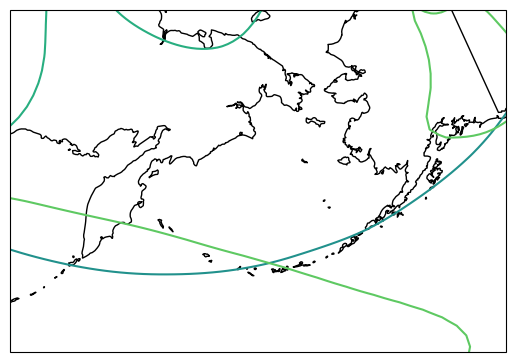

In [10]:
fig = plt.figure()
ax = plt.axes(projection=ccrs.LambertConformal(central_longitude=180, central_latitude=60))

# Add coastlines and other features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.set_extent([210, 150, 45, 70], crs=ccrs.PlateCarree())

# Plot the contour lines

geoh = ax.contour(gh9_s, transform=ccrs.PlateCarree())
temp = ax.contourf(ds_advec, transform=ccrs.PlateCarree(), cmap=plt.cm.YlGn_r)
wind = ax.contour(ws40)
# Add a colorbar

plt.show()

---

## 3. Acquiring your own data and making a plot

For this problem, go to the [GFS data access portal](https://www.ncei.noaa.gov/products/weather-climate-models/global-forecast), scroll down, and expand the 'Data on NCEI servers' tab. Choose a single grib file from the GFS-Analysis and download it (to access the data it's easiest to click on the HTTPS link which takes you to an FTP). Make a nice-looking plot (a 2D map or a 2D cross-section) of one of the variables in the file (I do not care which one).

In [20]:
ds2 = xr.open_dataset('gfs_3_20241118_1200_006.grb2',filter_by_keys={'typeOfLevel': 'isobaricInhPa'})

skipping variable: paramId==228164 shortName='tcc'
Traceback (most recent call last):
  File "/opt/conda/envs/uw-fall-2024/lib/python3.11/site-packages/cfgrib/dataset.py", line 721, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/opt/conda/envs/uw-fall-2024/lib/python3.11/site-packages/cfgrib/dataset.py", line 639, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  975.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,
        650.,  600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,
        200.,  150.,  100.,   70.,   50.,   40.,   30.,   20.,   15.,
         10.,    7.,    5.,    3.,    2.,    1.])) new_value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  975.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,
        650.,  600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,
        200.

In [21]:
ds2

<xarray.Dataset>
Dimensions:        (isobaricInhPa: 33, latitude: 181, longitude: 360)
Coordinates:
    time           datetime64[ns] ...
    step           timedelta64[ns] ...
  * isobaricInhPa  (isobaricInhPa) float64 1e+03 975.0 950.0 ... 3.0 2.0 1.0
  * latitude       (latitude) float64 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude      (longitude) float64 0.0 1.0 2.0 3.0 ... 357.0 358.0 359.0
    valid_time     datetime64[ns] ...
Data variables:
    gh             (isobaricInhPa, latitude, longitude) float32 ...
    t              (isobaricInhPa, latitude, longitude) float32 ...
    r              (isobaricInhPa, latitude, longitude) float32 ...
    q              (isobaricInhPa, latitude, longitude) float32 ...
    w              (isobaricInhPa, latitude, longitude) float32 ...
    wz             (isobaricInhPa, latitude, longitude) float32 ...
    u              (isobaricInhPa, latitude, longitude) float32 ...
    v              (isobaricInhPa, latitude, longitude) float32 ...
    absv           (isobaricInhPa, latitude, longitude) float32 ...
    o3mr           (isobaricInhPa, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    history:                 2024-11-24T19:05 GRIB to CDM+CF via cfgrib-0.9.1...

In [22]:
ds2 = ds2.metpy.quantify()

In [30]:
# temp=ds2.t
temp=ds2.t.sel(isobaricInhPa=500)
temp

Magnitude,[[235.36622619628906 235.36622619628906 235.36622619628906 ... 235.36622619628906 235.36622619628906 235.36622619628906] [235.0962371826172 235.07623291015625 235.04623413085938 ... 235.16622924804688 235.14622497558594 235.11622619628906] [234.70623779296875 234.6762237548828 234.63623046875 ... 234.8062286376953 234.77622985839844 234.74623107910156] ... [229.5862274169922 229.57623291015625 229.5562286376953 ... 229.65623474121094 229.63623046875 229.61622619628906] [229.82623291015625 229.81622314453125 229.8062286376953 ... 229.8462371826172 229.8362274169922 229.82623291015625] [229.2562255859375 229.2562255859375 229.2562255859375 ... 229.2562255859375 229.2562255859375 229.2562255859375]]
Units,kelvin


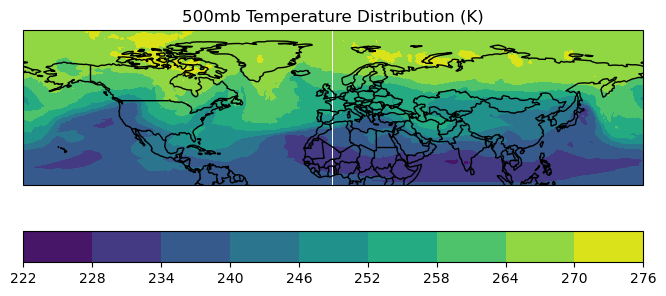

In [43]:
fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add coastlines and other features
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.set_title('500mb Temperature Distribution (K)')
# Plot the contour lines

wd = ax.contourf(temp, transform=ccrs.PlateCarree())
cbar = plt.colorbar(wd, ax=ax, orientation='horizontal', location='bottom')